# Importing Required Libraries

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# Importing and Analyzing the Sataset

In [ ]:
# Import the dataset
movie_reviews_labeled = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

movie_reviews_unlabeled = pd.read_csv("unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

test_data = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

In [ ]:
# Convert .tsv file to .csv file and read the csv file 
movie_reviews_labeled.to_csv('movie_reviews_labeled.csv')
movie_reviews = pd.read_csv('movie_reviews_labeled.csv')

In [ ]:
# Remove quotations from string and print first 5 rows of the dataset
movie_reviews['review'] = movie_reviews['review'].str.strip('" "')
movie_reviews.head()

,Unnamed: 0,id,sentiment,review
0,0,"""5814_8""",1,With all this stuff going down at the moment w...
1,1,"""2381_9""",1,"\""The Classic War of the Worlds\"" by Timothy H..."
2,2,"""7759_3""",0,The film starts with a manager (Nicholas Bell)...
3,3,"""3630_4""",0,It must be assumed that those who praised this...
4,4,"""9495_8""",1,Superbly trashy and wondrously unpretentious 8...


In [ ]:
# Take a look at any one of the reviews
movie_reviews['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [ ]:
# See the size of positive and negative sentiments in this dataset
movie_reviews.shape

NameError: ignored

From the output, it is clear that the dataset contains equal number of positive and negative reviews.

# Data preprocessing

In [ ]:
# Take a text string as a parameter
# Performs preprocessing on the string to remove special chracters from the string

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
# Preprocess our reviews and will store them in a new list as shown below
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

X[0]

'With all this stuff going down at the moment with MJ ve started listening to his music watching the odd documentary here and there watched The Wiz and watched Moonwalker again Maybe just want to get certain insight into this guy who thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent Moonwalker is part biography part feature film which remember going to see at the cinema when it was originally released Some of it has subtle messages about MJ feeling towards the press and also the obvious message of drugs are bad kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for minutes or so excluding th

In [ ]:
y = movie_reviews['sentiment']

In [ ]:
# Divide the dataset into 80% for training set and 20% for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Preparing the Embedding Layer

In [ ]:
# Prepare the embedding layer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Find the vocabulary size and then perform padding on both train and test set
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load the GloVe word embeddings
# Create a dictionary that will contain words as keys and their corresponding embedding list as values.
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create an embedding matrix where each row number will correspond to the index of the word in the corpus
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### Text Classification with Simple Neural Network

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

NameError: ignored

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
# Check the test accuracy and loss
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
# Plot the loss and accuracy differences for training and test sets
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Text Classification with a Convolutional Neural Network

In [ ]:
# Create a simple convolutional neural network with 1 convolutional layer and 1 pooling layer
from keras.layers.convolutional import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          6766600   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 128)          64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 6,830,857
Trainable params: 64,257
Non-trainable params: 6,766,600
_________________________________________________________________
None


In [ ]:
# Train our model and evaluate it on the training set
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
125/125 [==============================] - 10s 78ms/step - loss: 0.6189 - acc: 0.6476 - val_loss: 0.4565 - val_acc: 0.7880
Epoch 2/6
125/125 [==============================] - 10s 77ms/step - loss: 0.3998 - acc: 0.8281 - val_loss: 0.4216 - val_acc: 0.8043
Epoch 3/6
125/125 [==============================] - 10s 77ms/step - loss: 0.3357 - acc: 0.8595 - val_loss: 0.4154 - val_acc: 0.8062
Epoch 4/6
125/125 [==============================] - 10s 77ms/step - loss: 0.2963 - acc: 0.8829 - val_loss: 0.3773 - val_acc: 0.8278
Epoch 5/6
125/125 [==============================] - 10s 78ms/step - loss: 0.2404 - acc: 0.9146 - val_loss: 0.3834 - val_acc: 0.8260
Epoch 6/6
157/157 [==============================] - 1s 8ms/step - loss: 0.3698 - acc: 0.8420


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.36976635456085205
Test Accuracy: 0.8420000076293945


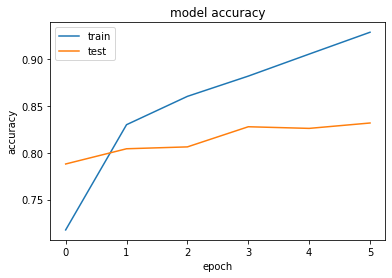

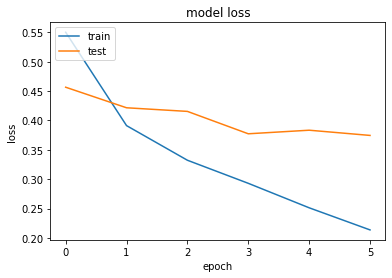

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### Text Classification with Recurrent Neural Network (LSTM)

In [ ]:
# Use an LSTM (Long Short Term Memory network)
from keras.layers import LSTM

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          6766600   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 6,883,977
Trainable params: 117,377
Non-trainable params: 6,766,600
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
125/125 [==============================] - 41s 311ms/step - loss: 0.6552 - acc: 0.5993 - val_loss: 0.5606 - val_acc: 0.7163
Epoch 2/6
125/125 [==============================] - 38s 307ms/step - loss: 0.5181 - acc: 0.7449 - val_loss: 0.4747 - val_acc: 0.7763
Epoch 3/6
125/125 [==============================] - 38s 308ms/step - loss: 0.4624 - acc: 0.7823 - val_loss: 0.4812 - val_acc: 0.7682
Epoch 4/6
125/125 [==============================] - 39s 309ms/step - loss: 0.4269 - acc: 0.8028 - val_loss: 0.4258 - val_acc: 0.8033
Epoch 5/6
125/125 [==============================] - 38s 307ms/step - loss: 0.4111 - acc: 0.8094 - val_loss: 0.4152 - val_acc: 0.8130
Epoch 6/6
157/157 [==============================] - 4s 28ms/step - loss: 0.3935 - acc: 0.8256


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3934667706489563
Test Accuracy: 0.8256000280380249


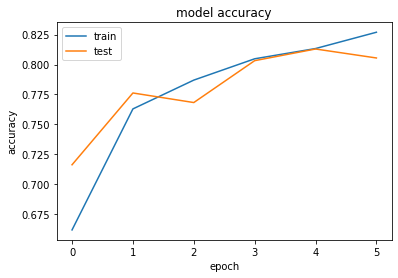

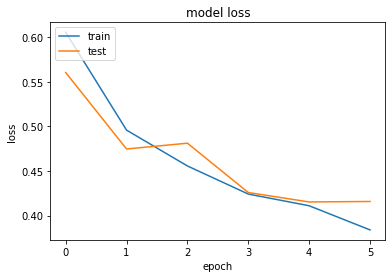

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Making Predictions on Single Instance

In [ ]:
# Select a review from our corpus
instance = X[57]
print(instance)

What stunning episode for this fine series This is television excellence at its best The story takes place in and it beautifully filmed in black white almost film noir style with its deep shadows and stark images This is story about two men who fall in love but don want to spoil this It is rare presentation of what homosexuals faced in the in America Written by the superb Tom Pettit and directed by the great Jeannot Szwarc we move through their lives their love for each other and their tragedy Taking on such sensitive issue makes this episode all the more stunning Our emotions are as torn and on edge as the characters Chills ran up my spine at the end when they played Bob Dylan gorgeous Ah but was so much older then m younger than that now as sung by the Byrds This one goes far past and all the way to the stars Beautiful 


In [ ]:
# Convert this review into numeric form to predict the sentiment
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.596767]], dtype=float32)

The sentiment is predicted as positive.